In [ ]:
Machine Learning's Mathematical Pillars

- Statistics
- Linear Algebra
- Calculus
- Probability

In [ ]:
                                Machine Learning
    Supervised                      Unsupervised                  Reinforcement
    Learning                         Learning                     Learning
Regression    Classification   Clustring  Dimension  Anomaly          Markov
                                          reduction  Detection        Decision
                                                                      Process
- Linear Regression                - k-means clustering
- Logistic Regression              - PCA(Principal Component
- k-nearest neighbour                        Analysis)
- Support Vector Machines(SVM)     - Autoencoders
- Decision Trees
- Random Forest
- AdaBoost
- Neural Network(Deep Learning)
    - CNN
    - RNN

https://www.google.com/search?q=maze+game&sxsrf=APq-WBtRrE3tY99lwk0Xsp_29meJvGZNvA:1649306471498&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiezu-ykYH3AhW8xDgGHcRLDa8Q_AUoAXoECAEQAw&biw=1600&bih=757#imgrc=1kxJXc_paBQ57M




Artificial Intelligence: A Modern Approach




https://www.google.com/search?q=clustering&sxsrf=APq-WBuB-xqWzzoNto0WojkAvXDLE8ywBA:1649307793182&source=lnms&tbm=isch&sa=X&ved=2ahUKEwih9IyploH3AhWySGwGHSzIBS4Q_AUoAXoECAIQAw&biw=1600&bih=757#imgrc=BOphoLQ0t9BnrM



https://this-person-does-not-exist.com/en





# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

TypeError: an integer is required (got type bytes)

In [4]:
!python --version

Python 3.8.10


In [5]:
!conda install python=3.7

^C


# Load the Data

In [6]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis ( Exploratory Data Analysis ) EDA

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Values

In [8]:
sns.heatmap?

<AxesSubplot:>

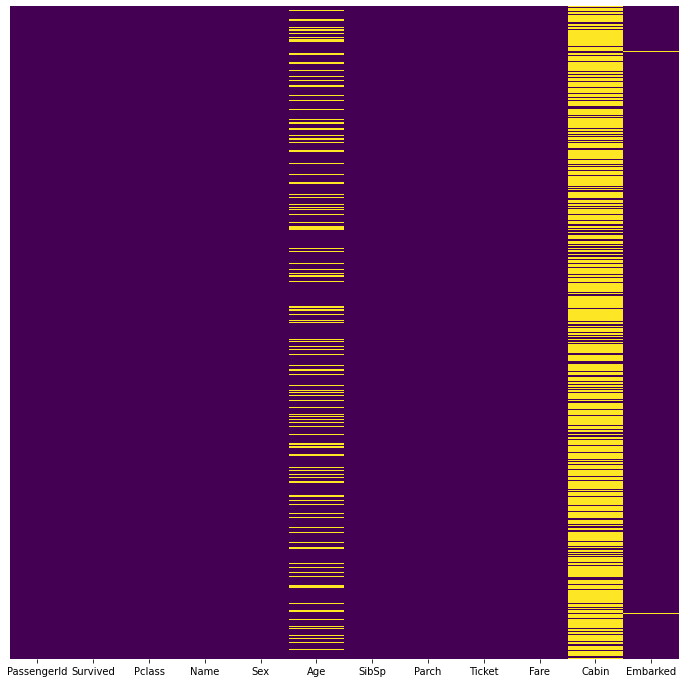

In [9]:
plt.figure(figsize=(12,12))

sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

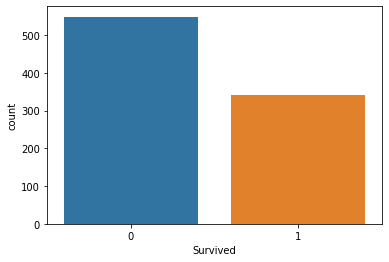

In [10]:
sns.countplot(x='Survived', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

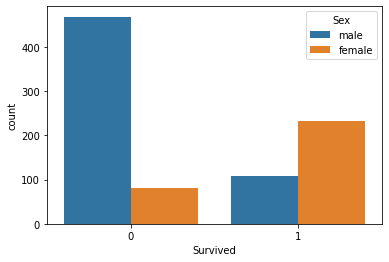

In [11]:
sns.countplot(x='Survived', hue='Sex' ,data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

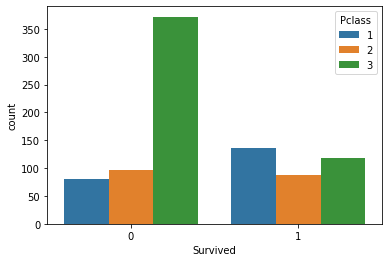

In [12]:
sns.countplot(x='Survived', hue='Pclass' ,data=titanic)

In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
sns.distplot?

C:\Users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

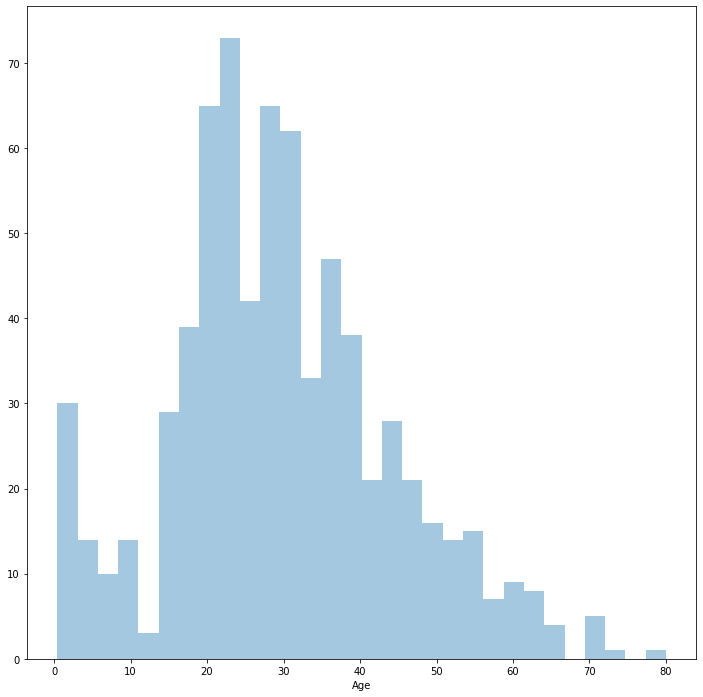

In [15]:
plt.figure(figsize=(12,12))

sns.distplot(titanic['Age'].dropna(), kde=False, bins=30 )

<AxesSubplot:xlabel='SibSp', ylabel='count'>

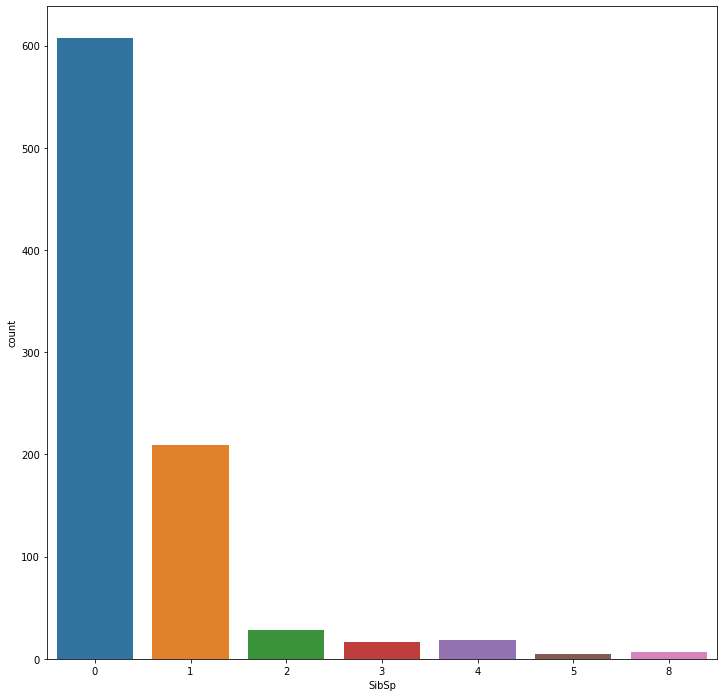

In [16]:
plt.figure(figsize=(12,12))
sns.countplot(x='SibSp', data=titanic)

C:\Users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

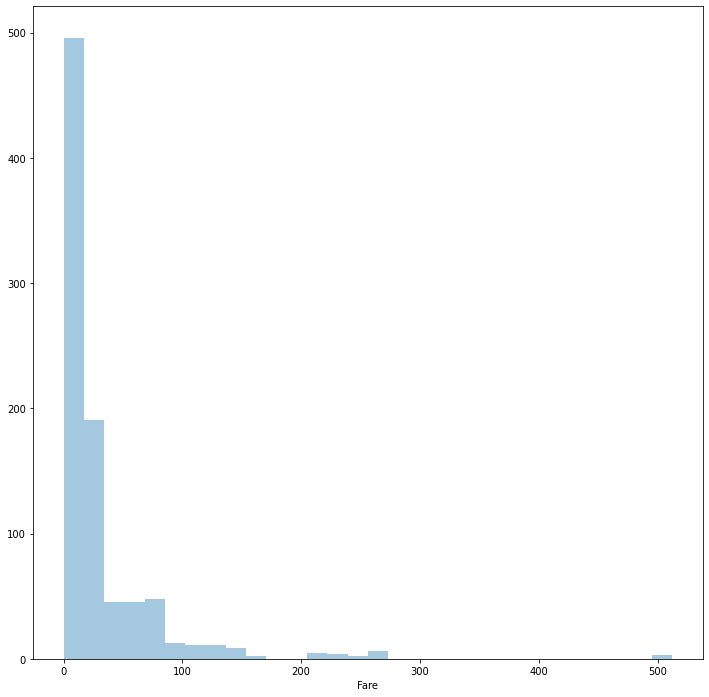

In [17]:
plt.figure(figsize=(12,12))

sns.distplot(titanic['Fare'].dropna(), kde=False, bins=30)